# Ford GoBike Rides Insights
## by Chisom Eluwa


## Investigation Overview


> In this investigation, I was interested to see how different variables showed bike riders behavioral patterns on the system. I focus on all variable of interest to understand their distribution and their relationships with the frequencies of rides per hour, day. My goal is to discover how these variables influence trip durations, riding hours, and riding days of the week.



## Dataset Overview

> > The dataset contains data of 183,000 rides made in a bike-sharing system covering the San Francisco Bay area. Data features include duration (secs) and others such as DateTime, customer type, gender, as well as some additional variables. The dataset can be downloaded from [here] (https://console.cloud.google.com/marketplace/details/san-francisco-public-data/sf-bike-share?pli=1&project=graphite-argon-344013)

In [1]:
# Hide codes

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# Load our data with pandas
ford_bikes = pd.read_csv("201902-fordgobike-tripdata.csv")

In [4]:
# drop rows with missing data in the specific columns
ford_bikes.dropna(axis=0, subset=['start_station_id', 'start_station_name', 'end_station_id', 
                                 'start_station_name', 'member_birth_year', 'member_gender'], inplace=True)

In [5]:
ford_bikes = ford_bikes.astype({'start_station_id': str, 'end_station_id': str, 'bike_id': str, 'member_birth_year': int}).fillna(0)

# Change the time columns from object to datetime
ford_bikes[['start_time','end_time']] = ford_bikes[['start_time','end_time']].apply(pd.to_datetime)

In [6]:
### Further create a Day, month, hour category from the time and year column options

ford_bikes['start_day'] = ford_bikes['start_time'].dt.day_name()
ford_bikes['start_month'] = ford_bikes['start_time'].dt.month_name()

# bike['start_year'] = bike['start_time'].dt.year
ford_bikes['start_hour'] = ford_bikes['start_time'].dt.hour
ford_bikes['start_hour'] = ford_bikes.start_hour.astype(str)


ford_bikes['end_day'] = ford_bikes['end_time'].dt.day_name()
ford_bikes['end_month'] = ford_bikes['end_time'].dt.month_name()
ford_bikes['end_hour'] = ford_bikes['end_time'].dt.hour
ford_bikes['end_hour'] = ford_bikes.end_hour.astype(str)

## Distribution of Ages of Ford Bike Members

The ages of members in the dataset take a range of values. We see a distribution slighly skewed to the right with alot of observations within ages 19-45 for the members. 

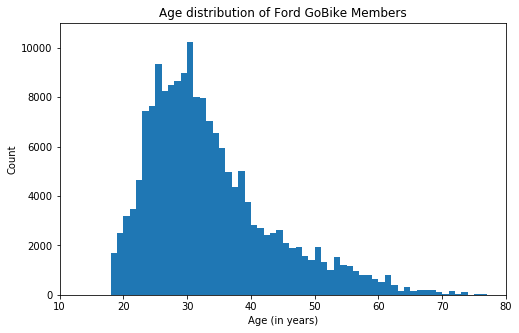

In [7]:
# Plot a new viz of age distribution from Members Year of Birth Column

binsize = 1
bins = np.arange(0, ford_bikes['member_birth_year'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = ford_bikes, x = 'member_birth_year', bins = bins);
plt.axis([1939, 2009, 0, 11000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
plt.xlabel('Age (in years)')
plt.ylabel('Count')
plt.title('Age distribution of Ford GoBike Members');

## Percentage of Users who share all their bike rides

We observe that some users share all their rides while others do not. There are only 10% of total users who share their rides.

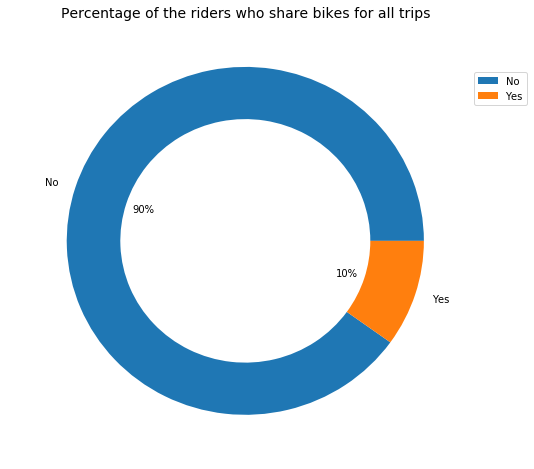

In [8]:
sharing = ford_bikes.bike_share_for_all_trip.value_counts()
sharing.plot(kind='pie', figsize=(8,8), wedgeprops={'width':0.3}, autopct='%1.0f%%');
plt.title('Percentage of the riders who share bikes for all trips', size=14);
plt.legend(bbox_to_anchor=(1, 0.9), loc='upper left');
plt.axis("off");

In [9]:
# convert day, and hour into ordered categorical types
ordinal_dict = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                   'start_hour': [str(x) for x in range(0,24)],
                   'end_hour': [str(x) for x in range(0,24)]}

for var in ordinal_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_dict[var])
    ford_bikes[var] = ford_bikes[var].astype(ordered_var)

## Distribution of Rides by Hours of the day

- We see rising trends for start and end hours between 6th to 9th hour (6am - 9am) and between 16th & 21st hour (4pm and 7pm). This might be because people are commuting to and back from work or businesses during these times

- The lowest trend is between 0hr to 5hrs (12midnight - 5am). These are typically sleeping hours.

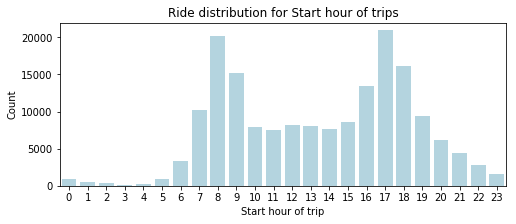

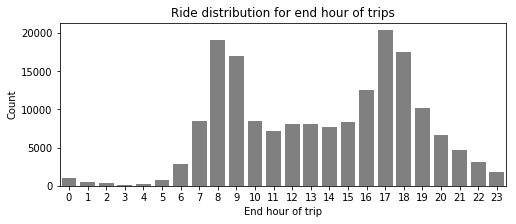

In [10]:

plt.figure(figsize=(8,3))
sns.countplot(data=ford_bikes, x='start_hour', color='lightblue')
plt.ylabel('Count')
plt.xlabel('Start hour of trip')
plt.title('Ride distribution for Start hour of trips');


plt.figure(figsize=(8,3))
sns.countplot(data=ford_bikes, x='end_hour', color='grey')
plt.ylabel('Count')
plt.xlabel('End hour of trip')
plt.title('Ride distribution for end hour of trips');

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Relationship between user type and trip durations

>  Among the members of Ford GoBike Users, the Customer types have a higher duration than the Subscriber types.

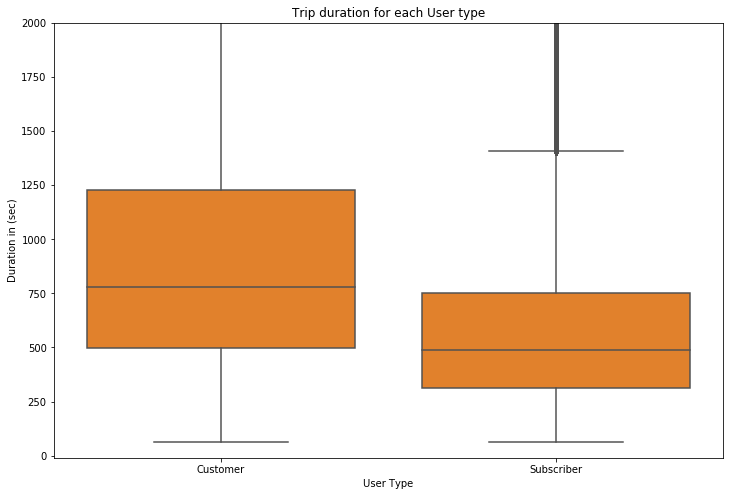

In [11]:

plt.figure(figsize=(12,8))
base_color = sns.color_palette()[1]
plt.ylim([-10, 2000])
sns.boxplot(data=ford_bikes, x = 'user_type', y='duration_sec', color = base_color);
plt.xlabel('User Type')
plt.ylabel('Duration in (sec)')
plt.title("Trip duration for each User type");

## Daily trip durations and how they vary across gender

> On a daily basis, the "Other" gender takes the longest times on their trips with Male members taking the least time across all days.

> The periods with the highest trip durations are on weekends(Saturdays & Sundays) across all genders.

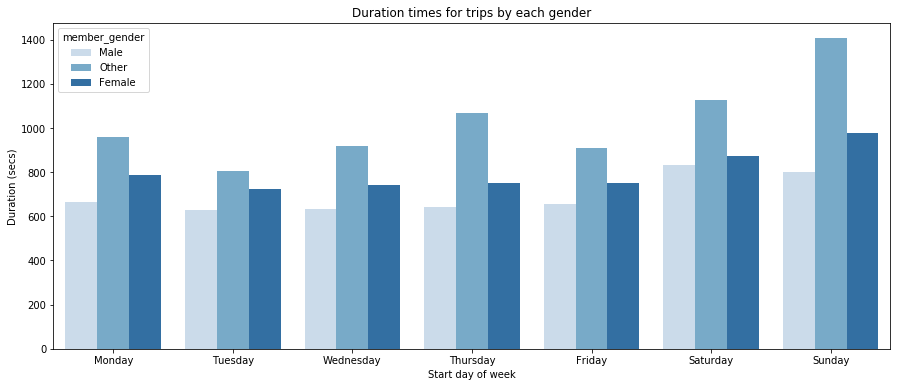

In [12]:

plt.figure(figsize=(15,6))
sns.barplot(data=ford_bikes, y = 'duration_sec', x='start_day', hue = 'member_gender', ci=None, palette = 'Blues');
plt.title('Duration times for trips by each gender');
plt.ylabel('Duration (secs)')
plt.xlabel('Start day of week');

## Daily trip durations and how they vary across User types

>  The Customer user type has the highest trip durations relative to Subscriber User types
>  The Customer members travel longer during weekends while the trend is relatively flat for subscriber type.



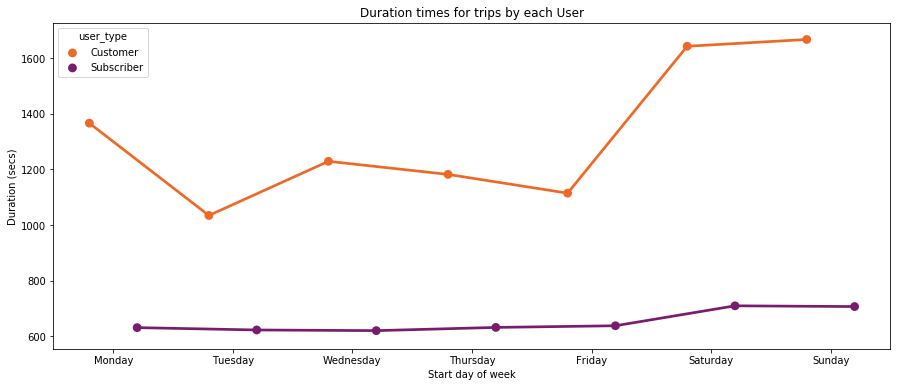

In [13]:

plt.figure(figsize=(15,6))
sns.pointplot(data=ford_bikes, y = 'duration_sec', x='start_day', hue = 'user_type', 
            dodge = 0.4, ci=None, palette = 'inferno_r');
plt.title('Duration times for trips by each User');
plt.ylabel('Duration (secs)')
plt.xlabel('Start day of week');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [14]:
# Use this command if you are running this file in local
!jupyter nbconvert --to slides --post serve --no-input --no-prompt

This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--debug
    set log level to logging.DEBUG (maximize logging output)
--generate-config
    generate default config file
-y
    Answer yes to any questions instead of prompting.
--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--stdout
    Write notebook output to stdout instead of files.
--inplace
    Run nbconvert in place, overwriting 

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.


## Thank You!